<a href="https://colab.research.google.com/github/eliazulai29/tensor/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-10-28 19:23:34.078653


In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-28 19:23:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.250.145.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.4MB/s    in 3.4s    

2023-10-28 19:23:37 (30.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/

test  train


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("/content/pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
pathlib.Path("pizza_steak/train/")

PosixPath('pizza_steak/train')

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



In [ ]:
# target_dir="pizza_steak/train/"
# target_class="steak"
# target_folder = target_dir + target_class
# target_folder

987732.jpg
Image shape: (512, 512, 3)


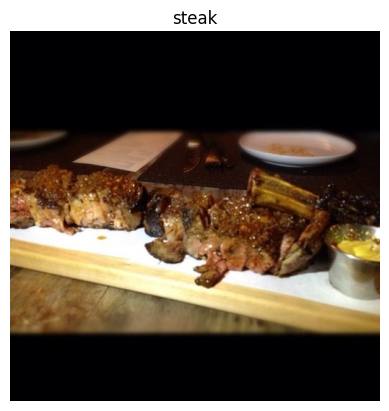

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
target_dir="pizza_steak/train/"
target_class="steak"
target_folder = target_dir + target_class
target_folder

'pizza_steak/train/steak'

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0

## end to end example
* load images
* preprocess images (between 0-1)
* build CNN to find patterns in our images
* compile our CNN
* fit the CNN to our train data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 150ms/step - loss: 0.5744 - accuracy: 0.6913 - val_loss: 0.4547 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4330 - accuracy: 0.7993 - val_loss: 0.3595 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.3924 - accuracy: 0.8207 - val_loss: 0.3683 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3789 - accuracy: 0.8407 - val_loss: 0.3171 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3365 - accuracy: 0.8633 - val_loss: 0.3422 - val_accuracy: 0.8560


In [ ]:
# get model_1 summery
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.6638 - accuracy: 0.6227 - val_loss: 0.6195 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 0.6241 - accuracy: 0.7320 - val_loss: 0.6021 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6165 - accuracy: 0.7427 - val_loss: 0.5962 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.5863 - accuracy: 0.7547 - val_loss: 0.5691 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.5723 - accuracy: 0.7760 - val_loss: 0.5957 - val_accuracy: 0.7560


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 115ms/step - loss: 2.9796 - accuracy: 0.6360 - val_loss: 0.8769 - val_accuracy: 0.6420
Epoch 2/5
47/47 [==============================] - 6s 109ms/step - loss: 0.6594 - accuracy: 0.7200 - val_loss: 0.4447 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.5839 - accuracy: 0.7500 - val_loss: 0.4359 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4441 - accuracy: 0.8040 - val_loss: 0.5414 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4653 - accuracy: 0.7820 - val_loss: 0.5551 - val_accuracy: 0.7300


In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Binary classification: Let's break it down
We just went through a whirlwind of steps:

* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied

# 1.Import and become one with the data

3140147.jpg
Image shape: (512, 512, 3)
3214153.jpg
Image shape: (512, 512, 3)


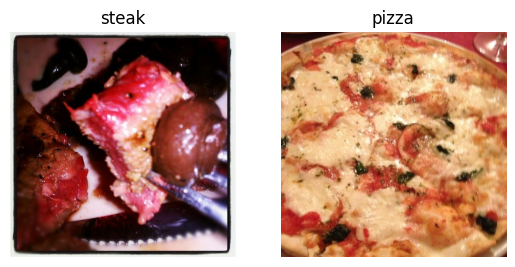

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
train_dir

'pizza_steak/train/'

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_datagen

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[0].shape, images[:2]

((224, 224, 3),
 array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
  

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

# 3.Create a model (start with a baseline)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape))
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)

])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# 4. Fit a model

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 146ms/step - loss: 0.9156 - accuracy: 0.5567 - val_loss: 0.5874 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5314 - accuracy: 0.7460 - val_loss: 0.5133 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3801 - accuracy: 0.8407 - val_loss: 0.8080 - val_accuracy: 0.6020
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3044 - accuracy: 0.8760 - val_loss: 0.5094 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 7s 138ms/step - loss: 0.1530 - accuracy: 0.9560 - val_loss: 0.5092 - val_accuracy: 0.7740


# 5. Evaluate the model


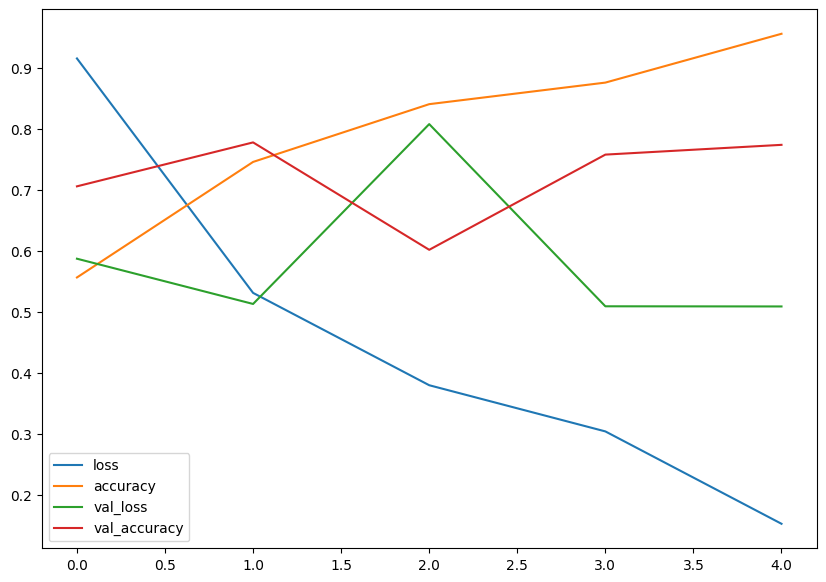

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

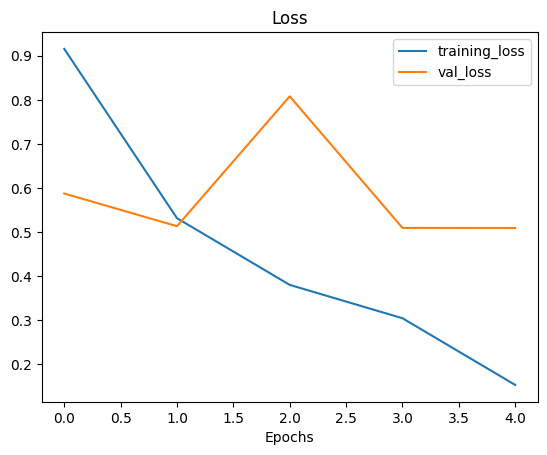

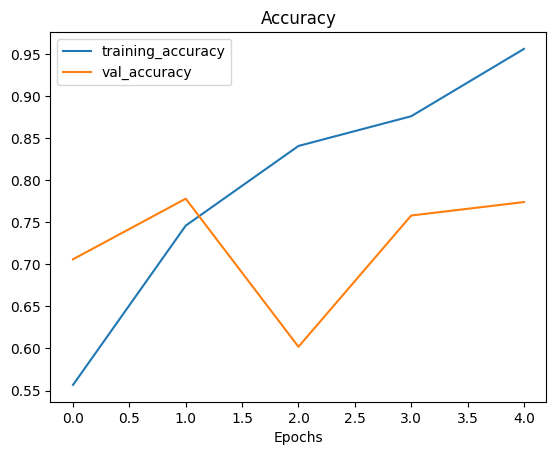

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
history_4.history

{'loss': [0.9155731797218323,
  0.531380832195282,
  0.38008013367652893,
  0.3044070601463318,
  0.1530444324016571],
 'accuracy': [0.5566666722297668,
  0.7459999918937683,
  0.840666651725769,
  0.8759999871253967,
  0.9559999704360962],
 'val_loss': [0.587410569190979,
  0.5132628083229065,
  0.8079742193222046,
  0.5094305276870728,
  0.5091728568077087],
 'val_accuracy': [0.7059999704360962,
  0.777999997138977,
  0.6019999980926514,
  0.7580000162124634,
  0.7739999890327454]}

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 6. Adjust the model parameters


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 138ms/step - loss: 0.6391 - accuracy: 0.6580 - val_loss: 0.5141 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5047 - accuracy: 0.7660 - val_loss: 0.4003 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4337 - accuracy: 0.8087 - val_loss: 0.3650 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3930 - accuracy: 0.8313 - val_loss: 0.3722 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3716 - accuracy: 0.8373 - val_loss: 0.3088 - val_accuracy: 0.8860


In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

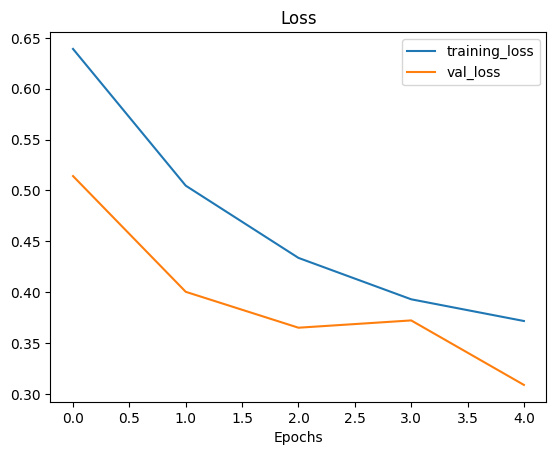

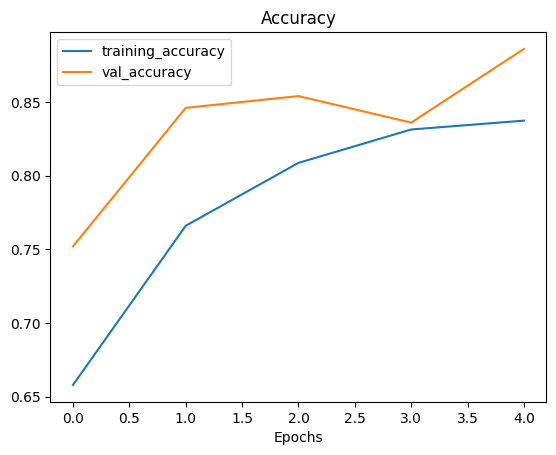

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

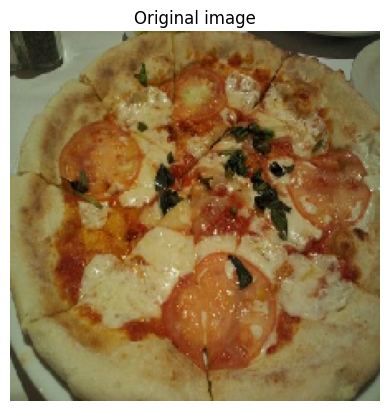

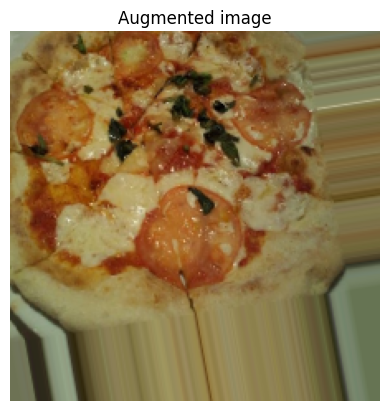

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);